# 1. METRICAS

## 1.1. Conectar Drive

In [1]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Cargar librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

## 1.3. Función cargar modelos .pkl

In [3]:
def load_pkl(file_name, path='/content/drive/MyDrive/keepcoding_NLP/'):
  rute = path + file_name
  with open(rute, 'rb') as file:
    data = pickle.load(file)
  return data

## 1.4. Función para imprimir resultados

In [4]:
def print_results(X,y,model):
  pred = model.predict(X)
  print('Matriz de confusion en Test:')
  cm = confusion_matrix(y, pred)
  print(cm)

  target_names = ['0', '1']
  # Graficar la matriz de confusión
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()
  print(classification_report(y, pred))

## 1.5. Cargar archivos de test y modelos.

In [5]:
y_test = load_pkl('y_test2.pkl')
X_test_cv_simple = load_pkl('X_test_cv_simple2.pkl')
X_test_cv_complex = load_pkl('X_test_cv_complex2.pkl')
X_test_tfidf_simple = load_pkl('X_test_tfidf_simple2.pkl')
X_test_tfidf_complex = load_pkl('X_test_tfidf_complex2.pkl')

lr_model_cv_simple = load_pkl('lr_model_cv_simple2.pkl')
lr_model_cv_complex = load_pkl('lr_model_cv_complex2.pkl')
lr_model_tfidf_simple = load_pkl('lr_model_tfidf_simple2.pkl')
lr_model_tfidf_complex = load_pkl('lr_model_tfidf_complex2.pkl')

knn_model_cv_simple = load_pkl('model_knn_cv_simple2.pkl')
knn_model_cv_complex = load_pkl('model_knn_cv_complex2.pkl')
knn_model_tfidf_simple = load_pkl('model_knn_tfidf_simple2.pkl')
knn_model_tfidf_complex = load_pkl('model_knn_tfidf_complex2.pkl')

svm_model_cv_simple = load_pkl('svm_model_cv_simple2.pkl')
svm_model_cv_complex = load_pkl('svm_model_cv_complex2.pkl')
svm_model_tfidf_simple = load_pkl('svm_model_tdidf_simple2.pkl')
svm_model_tfidf_complex = load_pkl('svm_model_tfidf_complex2.pkl')


# 2. MODELO REGRESION LINEAL.

## 2.1. Resultados counterVectorizer simple.

Matriz de confusion en Test:
[[2397  491]
 [ 598 2101]]


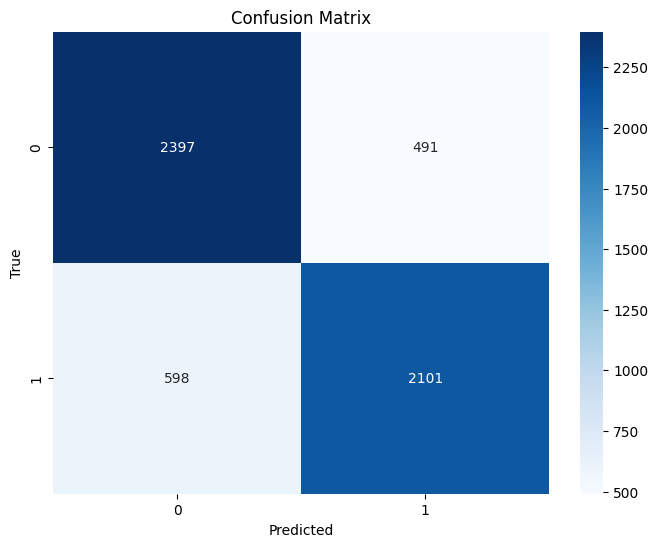

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2888
           1       0.81      0.78      0.79      2699

    accuracy                           0.81      5587
   macro avg       0.81      0.80      0.80      5587
weighted avg       0.81      0.81      0.80      5587



In [ ]:
print_results(X_test_cv_simple, y_test, lr_model_cv_simple)

El rendimiento del modelo es bastante equilibrado entre precisión y recall, con una exactitud general del 81%. Los F1-scores (que consideran tanto la precisión como el recall) también están bastante equilibrados para ambas clases.

## 2.2. Resultados counterVectorizer complejo.

Matriz de confusion en Test:
[[2398  490]
 [ 652 2047]]


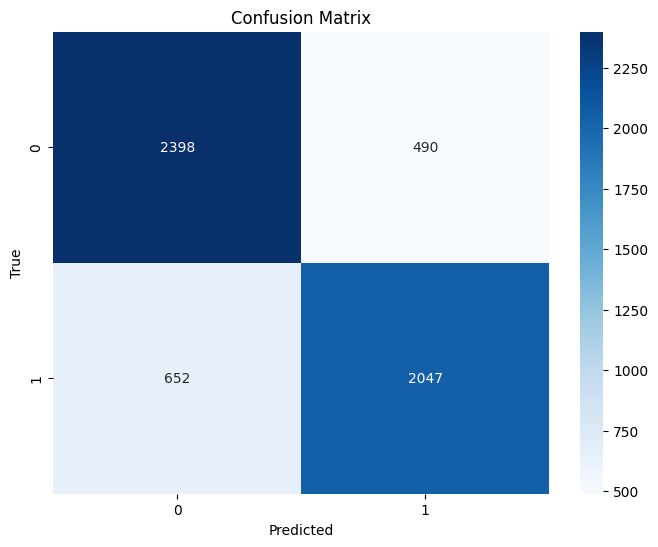

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2888
           1       0.81      0.76      0.78      2699

    accuracy                           0.80      5587
   macro avg       0.80      0.79      0.79      5587
weighted avg       0.80      0.80      0.80      5587



In [ ]:
print_results(X_test_cv_complex, y_test, lr_model_cv_complex)

La exactitud global del modelo es del 80%, lo que indica un buen rendimiento general en la clasificación de ambos tipos de instancias. Los F1-scores también son bastante equilibrados para ambas clases.

## 2.3. Resultados tfidfVectorizer simple.

Matriz de confusion en Test:
[[2458  430]
 [ 648 2051]]


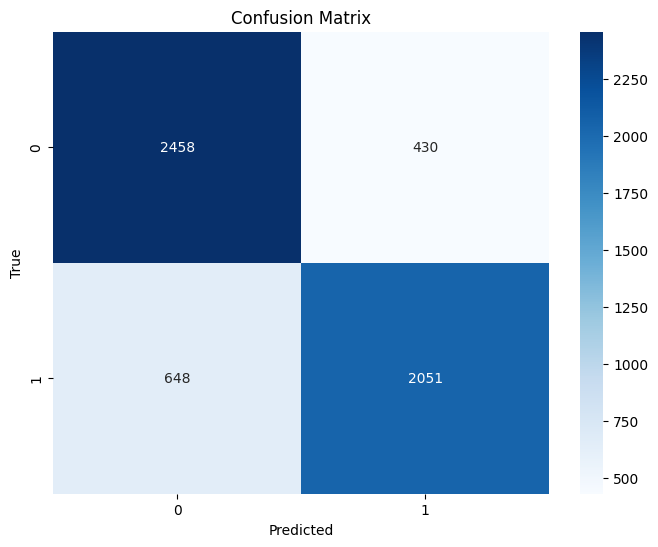

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2888
           1       0.83      0.76      0.79      2699

    accuracy                           0.81      5587
   macro avg       0.81      0.81      0.81      5587
weighted avg       0.81      0.81      0.81      5587



In [ ]:
print_results(X_test_tfidf_simple, y_test, lr_model_tfidf_simple)

El modelo demuestra un rendimiento sólido con una precisión global del 81%. Aunque hay margen para mejorar el recall de la clase 1, las métricas sugieren que el modelo es efectivo en la mayoría de los casos de uso.

## 2.4. Resultados tfidfVectorizer complejo.

Matriz de confusion en Test:
[[2429  459]
 [ 669 2030]]


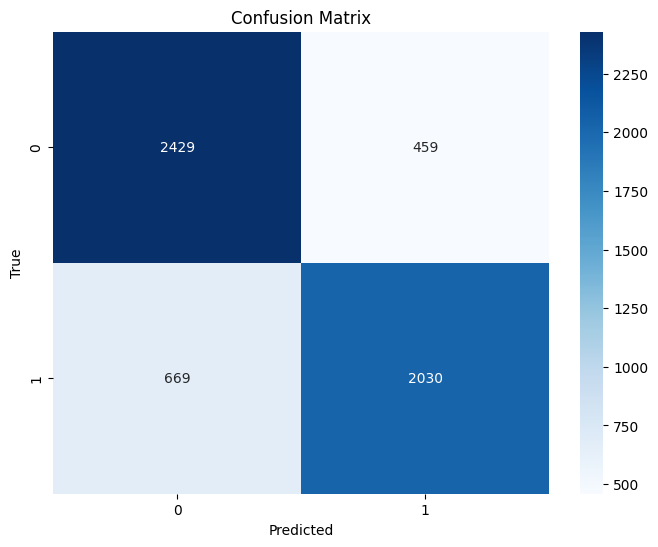

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2888
           1       0.82      0.75      0.78      2699

    accuracy                           0.80      5587
   macro avg       0.80      0.80      0.80      5587
weighted avg       0.80      0.80      0.80      5587



In [ ]:
print_results(X_test_tfidf_complex, y_test, lr_model_tfidf_complex)

Al igual que el modelo anterior se muestra un rendimiento sólido con una precisión global del 80%. Ajusta mejor en la clase 0, se podría mejorar el ajuste en la clase 1.

# 3. MODELO KN-NEIGBOURS

## 3.1. Resultados counterVectorizer simple.

Matriz de confusion en Test:
[[1830 1058]
 [ 655 2044]]


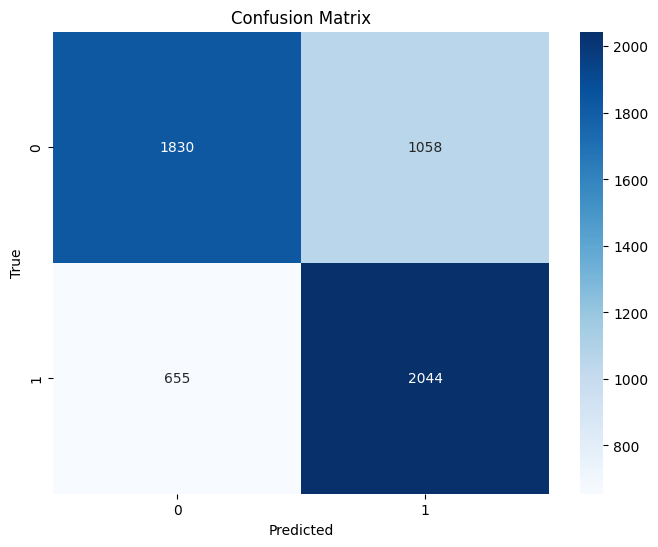

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      2888
           1       0.66      0.76      0.70      2699

    accuracy                           0.69      5587
   macro avg       0.70      0.70      0.69      5587
weighted avg       0.70      0.69      0.69      5587



In [ ]:
print_results(X_test_cv_simple, y_test, knn_model_cv_simple)

El modelo muestra una precisión razonable pero un recall más bajo para la clase 0. Esto sugiere que el modelo puede estar subestimando la cantidad de ejemplos reales de clase 0.

Sin embargo aunque la precisión es más baja para la clase 1, el recall es más alto, lo que indica que el modelo es mejor para identificar ejemplos reales de clase 1.

## 3.2. Resultados counterVectorizer complejo

Matriz de confusion en Test:
[[2070  818]
 [ 892 1807]]


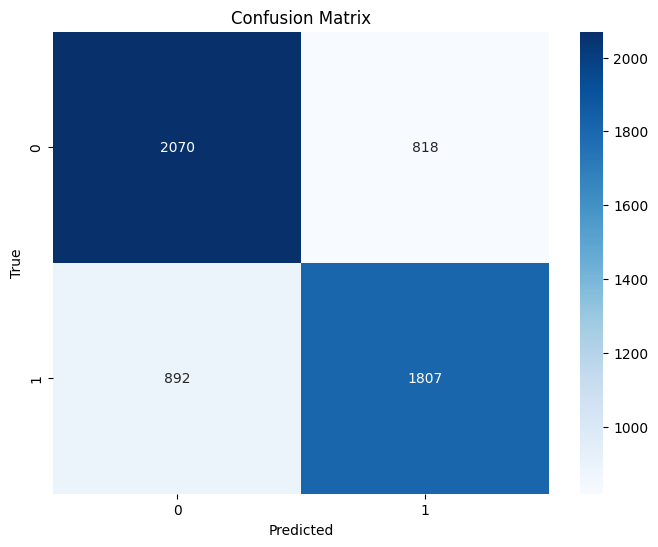

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2888
           1       0.69      0.67      0.68      2699

    accuracy                           0.69      5587
   macro avg       0.69      0.69      0.69      5587
weighted avg       0.69      0.69      0.69      5587



In [ ]:
print_results(X_test_cv_complex, y_test, knn_model_cv_complex)

El modelo muestra una precisión y recall razonables para la clase 0, indicando una capacidad adecuada para identificar ejemplos de esta clase.

Sin embargo, la precisión es ligeramente más baja para la clase 1 en comparación con la clase 0, pero el recall también es competitivo. Esto sugiere que el modelo puede identificar razonablemente bien los ejemplos de clase 1, aunque podría mejorar en la precisión.

El modelo tiene una exactitud global del 69%, aunque podría haber margen para mejorar la precisión y el recall en ambos tipos de clase.

## 3.3. Resultados tfidfVectorizer simple.

Matriz de confusion en Test:
[[2021  867]
 [ 843 1856]]


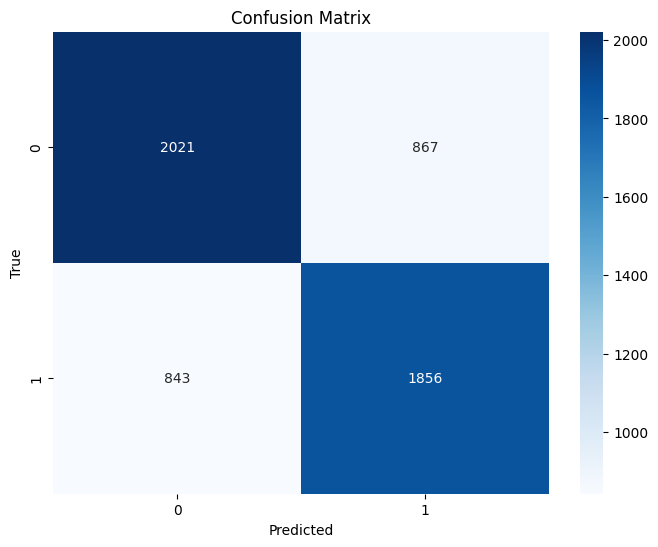

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      2888
           1       0.68      0.69      0.68      2699

    accuracy                           0.69      5587
   macro avg       0.69      0.69      0.69      5587
weighted avg       0.69      0.69      0.69      5587



In [ ]:
print_results(X_test_tfidf_simple, y_test, knn_model_tfidf_simple)

El modelo muestra una precisión y recall razonables para la clase 0, indicando una capacidad adecuada para identificar ejemplos de esta clase.

Aunque la precisión es ligeramente más baja para la clase 1 en comparación con la clase 0, el recall es similar. Esto sugiere que el modelo puede identificar razonablemente bien los ejemplos de clase 1, aunque podría mejorar en la precisión.

El modelo tiene una exactitud global del 69%.
Las métricas muestran una capacidad aceptable para predecir las etiquetas correctas.
Podría considerarse ajustes adicionales para mejorar la precisión y recall, especialmente en la clase 1.

## 3.4. Resultados tfidfVectorizer complejo.

Matriz de confusion en Test:
[[ 952 1936]
 [ 552 2147]]


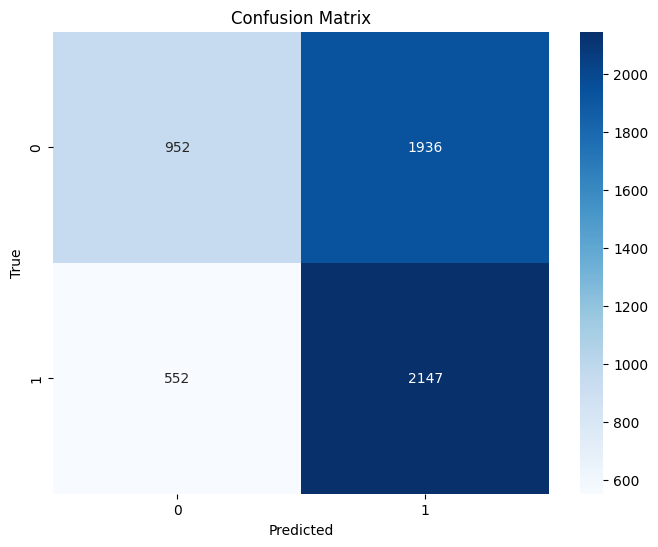

              precision    recall  f1-score   support

           0       0.63      0.33      0.43      2888
           1       0.53      0.80      0.63      2699

    accuracy                           0.55      5587
   macro avg       0.58      0.56      0.53      5587
weighted avg       0.58      0.55      0.53      5587



In [6]:
print_results(X_test_tfidf_complex, y_test, knn_model_tfidf_complex)

El modelo tiene un recall más alto para la clase 1 (0.80) en comparación con la clase 0 (0.33), lo que indica que es mejor identificando instancias de la clase 1.
La precisión es mayor para la clase 0 (0.63) en comparación con la clase 1 (0.53), lo que sugiere que cuando el modelo predice la clase 0, es más probable que sea correcto.
La exactitud general del modelo es del 55%, lo que indica un rendimiento relativamente modesto.

# 4. MODELO SVM

## 4.1. Resultados counterVectorizer simple

Matriz de confusion en Test:
[[2530  358]
 [1032 1667]]


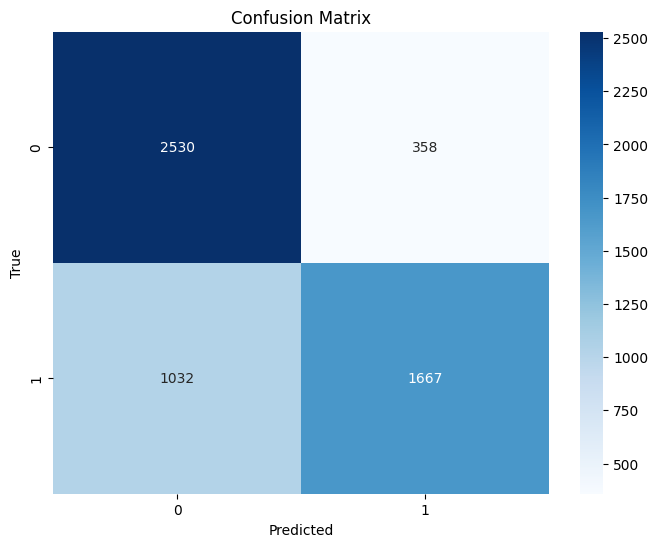

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      2888
           1       0.82      0.62      0.71      2699

    accuracy                           0.75      5587
   macro avg       0.77      0.75      0.75      5587
weighted avg       0.76      0.75      0.75      5587



In [7]:
print_results(X_test_cv_simple, y_test, svm_model_cv_simple)

El modelo tiene una precisión y recall más balanceados entre ambas clases en comparación con el informe anterior.
La precisión es ligeramente mayor para la clase 1 (0.82) en comparación con la clase 0 (0.71), lo que sugiere que cuando el modelo predice la clase 1, es más probable que sea correcto.

El recall es significativamente mayor para la clase 0 (0.88) en comparación con la clase 1 (0.62), indicando que el modelo es mejor identificando instancias de la clase 0.

La exactitud general del modelo es del 75%, lo que representa una mejora significativa.

## 4.2. Resultados counterVectorizer complejo.

Matriz de confusion en Test:
[[2504  384]
 [ 943 1756]]


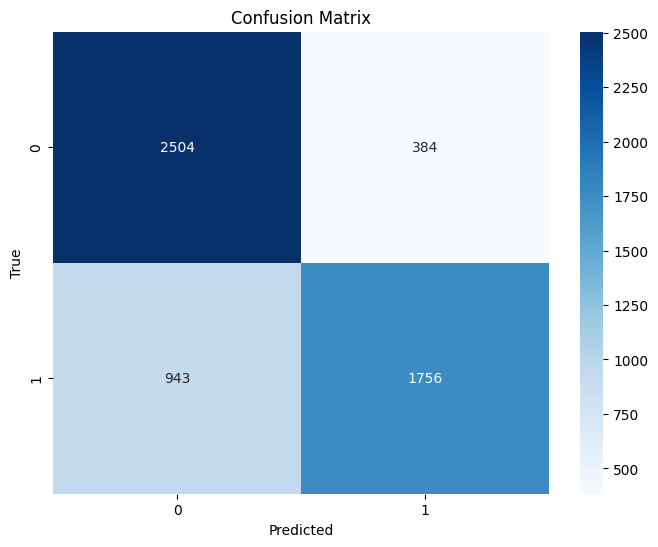

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      2888
           1       0.82      0.65      0.73      2699

    accuracy                           0.76      5587
   macro avg       0.77      0.76      0.76      5587
weighted avg       0.77      0.76      0.76      5587



In [8]:
print_results(X_test_cv_complex, y_test, svm_model_cv_complex)

El modelo tiene un rendimiento equilibrado con una precisión y recall razonablemente buenos en ambas clases.

La precisión es mayor para la clase 1 (0.82) en comparación con la clase 0 (0.73), lo que sugiere que las predicciones de clase 1 son más precisas.

El recall es mayor para la clase 0 (0.87) en comparación con la clase 1 (0.65), indicando que el modelo es mejor identificando instancias de la clase 0.

La exactitud general del modelo es del 76%, lo cual es un rendimiento sólido.

## 4.3. Resultados modelo tfidfVectorizer simple.

Matriz de confusion en Test:
[[2402  486]
 [ 606 2093]]


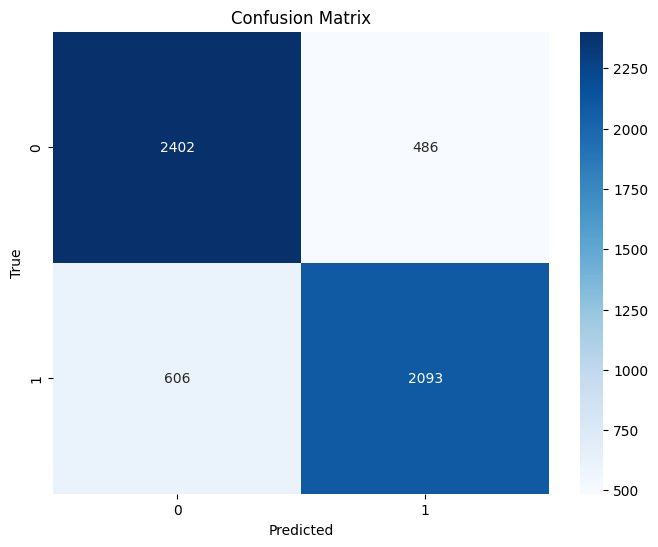

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2888
           1       0.81      0.78      0.79      2699

    accuracy                           0.80      5587
   macro avg       0.81      0.80      0.80      5587
weighted avg       0.80      0.80      0.80      5587



In [6]:
print_results(X_test_tfidf_simple, y_test, svm_model_tfidf_simple)

El modelo muestra un rendimiento sólido con un F1-score promedio de 0.80, lo que indica un buen equilibrio entre precisión y recall.

Las métricas de precisión y recall son similares para ambas clases, sugiriendo que el modelo no está sesgado hacia ninguna clase específica.

El modelo presenta una accuracy del 80%.

## 4.4. Resultados modelo tfidfVectorizer complejo.

Matriz de confusion en Test:
[[2387  501]
 [ 636 2063]]


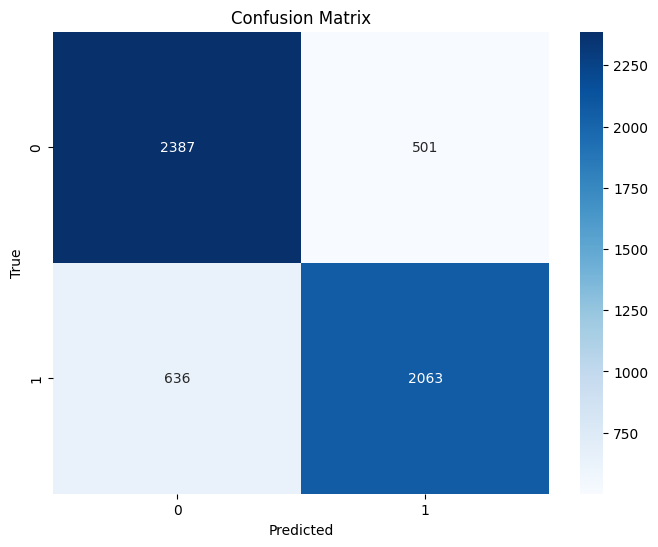

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2888
           1       0.80      0.76      0.78      2699

    accuracy                           0.80      5587
   macro avg       0.80      0.80      0.80      5587
weighted avg       0.80      0.80      0.80      5587



In [9]:
print_results(X_test_tfidf_complex, y_test, svm_model_tfidf_complex)

Tanto la precisión como el recall son altos y muy similares para ambas clases, lo cual indica una capacidad equilibrada para predecir ambas clases.

La exactitud general del modelo es del 80%, lo cual es bastante bueno y sugiere que el modelo está haciendo predicciones precisas y consistentes.

# 5. MODELOS DEEP LEARNING

In [9]:
!pip install tensorflow

In [2]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.models import load_model

# Carga el modelo
model_lstm = load_model('/content/drive/MyDrive/keepcoding_NLP/best_model_lstm.h5')
model_gru = load_model('/content/drive/MyDrive/keepcoding_NLP/best_model_gru.h5')
model_rnn = load_model('/content/drive/MyDrive/keepcoding_NLP/best_model_rnn.h5')
model_rnnw2v = load_model('/content/drive/MyDrive/keepcoding_NLP/best_model_rnnw2v.h5')


In [6]:
import numpy as np
X_test_padded = np.load('/content/drive/MyDrive/keepcoding_NLP/X_test_padded.npy')
y_test = np.load('/content/drive/MyDrive/keepcoding_NLP/y_test_padded.npy')

## 5.1 LSTM

In [8]:
from sklearn.metrics import classification_report
batch_size = 4096
#Evaluate the model
print("[INFO]: Evaluando red neuronal...")
predsTest = model_lstm.predict(X_test_padded, batch_size=batch_size)
predictions = (predsTest > 0.5).astype(int)

print('Resultados en Test')
print(classification_report(y_test, predictions, digits=3))


[INFO]: Evaluando red neuronal...
2/2 [==============================] - 59s 13s/step
Resultados en Test
              precision    recall  f1-score   support

           0      0.760     0.741     0.750      2888
           1      0.730     0.750     0.740      2699

    accuracy                          0.745      5587
   macro avg      0.745     0.745     0.745      5587
weighted avg      0.746     0.745     0.745      5587



El modelo muestra una buena precisión y recall para la clase 0, indicando una capacidad sólida para identificar ejemplos de esta clase.
La precisión y el recall para la clase 1 son también buenos y muy cercanos a los de la clase 0, lo que sugiere que el modelo tiene un desempeño balanceado entre ambas clases.

El modelo tiene una exactitud global del 74.5%.
Muestra un rendimiento sólido en la clasificación binaria. Las métricas de precisión, recall y F1-score están equilibradas para ambas clases, lo que sugiere que el modelo es eficaz en predecir las etiquetas correctas para ambos tipos de clase.



## 5.2. GRU

In [9]:
from sklearn.metrics import classification_report
batch_size = 4096
#Evaluate the model
print("[INFO]: Evaluando red neuronal...")
predsTest = model_gru.predict(X_test_padded, batch_size=batch_size)
predictions = (predsTest > 0.5).astype(int)

print('Resultados en Test')
print(classification_report(y_test, predictions, digits=3))

[INFO]: Evaluando red neuronal...
2/2 [==============================] - 25s 7s/step
Resultados en Test
              precision    recall  f1-score   support

           0      0.774     0.823     0.797      2888
           1      0.797     0.742     0.769      2699

    accuracy                          0.784      5587
   macro avg      0.785     0.783     0.783      5587
weighted avg      0.785     0.784     0.783      5587



El modelo muestra una capacidad sólida para identificar ejemplos de la clase 0. El alto recall sugiere que el modelo es efectivo para identificar la mayoría de los ejemplos de clase 0.

La precisión para la clase 1 es ligeramente mayor que para la clase 0, aunque el recall es un poco menor. Con un F1-score de 0.769, el modelo también demuestra un buen desempeño en la identificación de ejemplos de clase 1.

El modelo tiene una accuracy del 78.4% y muestra un rendimiento sólido en la clasificación binaria. Las métricas de precisión, recall y F1-score están equilibradas para ambas clases.



## 5.3. RNN

In [10]:
from sklearn.metrics import classification_report
batch_size = 4096
#Evaluate the model
print("[INFO]: Evaluando red neuronal...")
predsTest = model_rnn.predict(X_test_padded, batch_size=batch_size)
predictions = (predsTest > 0.5).astype(int)

print('Resultados en Test')
print(classification_report(y_test, predictions, digits=3))

[INFO]: Evaluando red neuronal...
2/2 [==============================] - 6s 2s/step
Resultados en Test
              precision    recall  f1-score   support

           0      0.517     1.000     0.682      2888
           1      0.000     0.000     0.000      2699

    accuracy                          0.517      5587
   macro avg      0.258     0.500     0.341      5587
weighted avg      0.267     0.517     0.352      5587



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo muestra un rendimiento desequilibrado en la clasificación binaria, con una exactitud global del 51.7%. Para la clase 0, la precisión es del 51.7% y el recall es del 100%, lo que indica que el modelo predice correctamente todas las instancias de la clase 0 pero a costa de una alta tasa de falsos positivos. Para la clase 1, tanto la precisión como el recall son del 0%, indicando que el modelo no identifica ninguna instancia de la clase 1 correctamente. Este desequilibrio sugiere que el modelo está sesgado hacia la clase 0 y no es efectivo en la identificación de la clase 1.

Este modelo no está prediciendo bien. Podemos:
Revisar el Balance de Clases: Es posible que tu conjunto de datos tenga un desequilibrio entre las clases (más instancias de una clase que de la otra). Esto puede afectar el rendimiento del modelo, especialmente para la clase minoritaria.

Ajustar el Umbral de Clasificación: Se puede considerar ajustar el umbral de decisión (0.5 en este caso) para mejorar el rendimiento del modelo en términos de precision y recall.

Explorar Técnicas de Balanceo de Clases: Si el desequilibrio entre las clases es significativo, podrías explorar técnicas como el submuestreo, sobremuestreo o métodos de generación sintética de datos para abordar este problema.

Esto puede ser por tener pocos datos que en algún momento el modelo no pueda predecir bien, aunque en otros modelos si hay algo de equilibrio.

## 5.4. RNN+WORD2VEC

In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

In [23]:
tokenizer = Tokenizer()
max_words = 500
batch_size = 32
test = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_test2.csv')
X_test = test['review']
y_test = test['sentimiento']
X_test_words = pd.DataFrame(X_test, columns=["review"])
X_test_words = pad_sequences(tokenizer.texts_to_sequences(X_test_words.review), maxlen=max_words)
# Evaluate the model
print("[INFO]: Evaluando red neuronal...")
preds = model_rnnw2v.predict(X_test_words, batch_size=batch_size)

predictions_test = (preds > 0.5).astype(int)


print('Resultados en Test')
print(classification_report(y_test, predictions_test, digits=3))


[INFO]: Evaluando red neuronal...
175/175 [==============================] - 36s 209ms/step
Resultados en Test
              precision    recall  f1-score   support

           0      0.000     0.000     0.000      2888
           1      0.483     1.000     0.651      2699

    accuracy                          0.483      5587
   macro avg      0.242     0.500     0.326      5587
weighted avg      0.233     0.483     0.315      5587



Los resultados del classification_report sugieren que el modelo está prediciendo predominantemente la clase mayoritaria (clase 1) y tiene dificultades para identificar correctamente la clase minoritaria (clase 0).

Habría que ajustar parámetros, comprobar el balanceo de los datos o aumentar el número de datos.



## 5.5. BERT

In [11]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [2]:
! pip install --force-reinstall transformers[tf-cpu] tensorflow==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 21.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1)
ERROR: No matching distribution found for tensorflow==2.7.0


In [3]:
!pip install -U transformers[torch] accelerate

  Using cached transformers-4.42.3-py3-none-any.whl (9.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (

In [1]:
from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
import numpy as np
import pandas as pd

model_path = "/content/drive/MyDrive/keepcoding_NLP/model_bert"  # Ruta donde guardaste el modelo

# Cargar el modelo
model = BertForSequenceClassification.from_pretrained(model_path)


# Define output directory for training arguments
output_dir = "data/out"  # Este debe ser el mismo que usaste para training_args en la fase de entrenamiento
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

test = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_test2.csv')
test_dataset = Dataset.from_pandas(test)

# Tokenize function
def tokenize_function(examples):
    return tokenizer(examples['review'], padding='max_length', truncation=True, max_length=512)
test_dataset = test_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.rename_column('sentimiento', 'labels')
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Define evaluation training arguments
eval_training_args = TrainingArguments(
    output_dir=output_dir,             # Output directory
    per_device_eval_batch_size=16      # Batch size for evaluation
)

# Create a new Trainer for evaluation
eval_trainer = Trainer(
    model=model,
    args=eval_training_args,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer)
)

# Evaluation on test dataset
eval_results = eval_trainer.evaluate(eval_dataset=test_dataset)

# Get predictions
predictions = eval_trainer.predict(test_dataset)

# Convert predictions to labels
predicted_labels = predictions.predictions.argmax(axis=1)

# Evaluation metrics (optional)
accuracy = accuracy_score(test_dataset['labels'], predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(test_dataset['labels'], predicted_labels, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/5587 [00:00<?, ? examples/s]

Accuracy: 0.8147485233577949
Precision: 0.8065585851142225
Recall: 0.81104112634309
F1-score: 0.808793644928875



La accuracy es de 81.47%, el modelo está funcionando bien en términos de predicciones correctas totales.

Podemos observar que la precisión y el recall están bastante equilibrados (80.66% y 81.10%, respectivamente), lo que sugiere que el modelo maneja bien tanto los falsos positivos como los falsos negativos.

El modelo arroja un F1-score alto 80.88% lo que indica un buen equilibrio entre precisión y recall.

# 6. CONCLUSIONES

Debido a que tuve que trabajar con un subconjunto de datos, los resultados pueden no ser óptimos en ninguno de los modelos.

Algunos modelos han funcionado mejor, mientras que otros han tenido dificultades para identificar alguna de las clases.

Al trabajar con diferentes modelos de machine learning y deep learning, he enfrentado desafíos con el tratamiento de los datos. Especialmente en el caso de SVM y algunos modelos de deep learning como el modelo preentrenado BERT, he tenido que lidiar con tiempos de ejecución prolongados y las limitaciones de Google Colab. Estas restricciones me llevaron a reducir el tamaño de los lotes (batch), disminuir el número de épocas (epochs), entre otros ajustes, para evitar problemas de memoria RAM.

Inicialmente, comencé con un dataset aleatorio, pero los resultados fueron insatisfactorios debido al desbalance hacia el sentimiento positivo. Finalmente, rehice el tratamiento de datos, balanceando el número de reseñas positivas y negativas, lo cual mejoró la calidad de los resultados.

En algunos modelos, no he visualizado la matriz de confusión debido a los desafíos de recursos, con el fin de aligerar el código en lo posible.

Para el análisis, he tenido en cuenta métricas como la exactitud, precisión, recall y F1-score, con el objetivo de evaluar qué modelos eran capaces de predecir efectivamente ambas clases.

El modelo que mejores valore da en conjunto es el último el que usa un modelo preentrenado tipo BERT.
